In [189]:
!pip install opencv-python
!pip install matplotlib
!pip install scikit-image
!pip install numpy
!pip install stsci.ndimage
!pip install scikit-image
!pip install pandas


  Using cached stsci.ndimage-0.10.3.tar.gz (99 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [72 lines of output]
    Using cached stsci.distutils-0.3.7.tar.gz (48 kB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'done'
    Getting requirements to build wheel: started
    Getting requirements to build wheel: finished with status 'done'
    Installing backend dependencies: started
    Installing backend dependencies: finished with status 'done'
    Preparing metadata (pyproject.toml): started
    Preparing metadata (pyproject.toml): finished with status 'error'
    error: subprocess-exited-with-error
  
    Preparing metadata (pyproject.toml) did not run successfully.
    exit code: 1
  
    [45 lines of output]
    <string>:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    C:\Users\vmarq\AppData\Local\Temp\pip-buil

In [2]:
import cv2
import matplotlib.pylab as plt
from skimage.segmentation import felzenszwalb
from skimage.color import rgba2rgb
from skimage import io, measure
import numpy as np
from scipy import ndimage as nd
from skimage.color import label2rgb

## Leitura das imagens

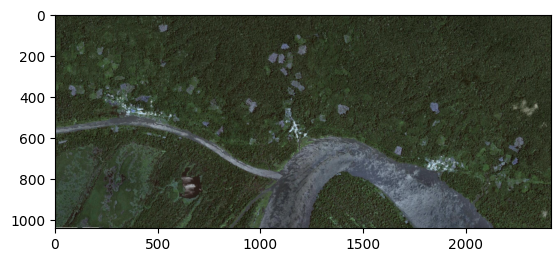

In [13]:
img = cv2.imread("image.png")
plt.imshow(img)

## Display Images

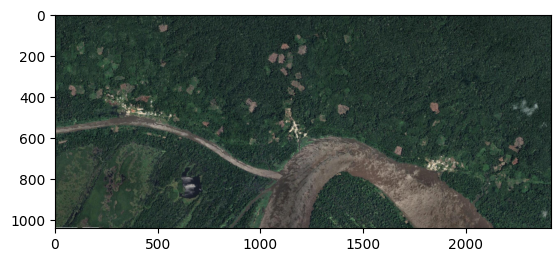

In [36]:
plt.figure("Original")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)

### Conversao para escala de cinza

##### A conversão de uma imagem colorida para escala de cinza envolve a redução das informações de cor da imagem, resultando em uma imagem em tons de cinza, onde cada pixel representa uma intensidade luminosa única, em vez de uma combinação de cores.

A imagem resultante, armazenada na variável gray, é uma imagem em escala de cinza na qual os valores dos pixels representam a intensidade luminosa em vez de cores. Os pixels variam de 0 (preto) a 255 (branco), onde 0 representa ausência de luz (pixel preto) e 255 representa a máxima intensidade luminosa (pixel branco).

Essa conversão para escala de cinza é útil em várias aplicações de processamento de imagem, como detecção de bordas, análise de histograma, extração de características e segmentação de objetos em imagens. Geralmente, simplifica o processamento de imagens, pois reduz a complexidade da informação de cor para uma única dimensão (intensidade luminosa).

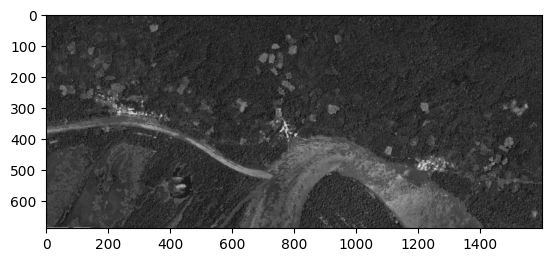

In [5]:
plt.figure("Grayscale")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

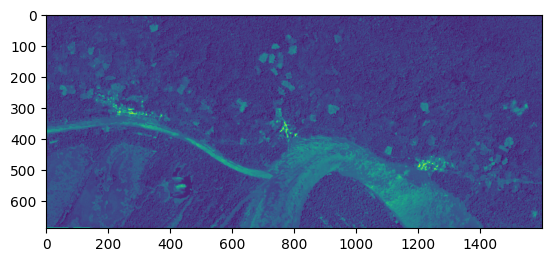

In [4]:
plt.figure("Grayscale")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### Limiarizacao

#### Após a execução desta linha de código, a variável thresh conterá uma imagem binária resultante da limiarização, onde os pixels que eram maiores ou iguais a 0 na imagem em escala de cinza original serão brancos (255) e os pixels menores que 0 serão pretos (0). Essa técnica é comumente usada para criar uma imagem binária que destaca objetos de interesse em relação ao fundo.

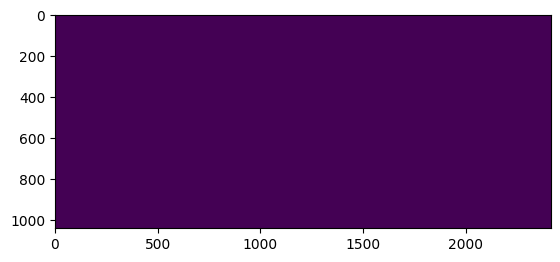

In [17]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
plt.figure("Binary")
plt.imshow(thresh)

### O algoritimo OTSU separa os pixels reune os pixels com maior variacao, nesse caso, apos a utilizacao do filtro binario a imagen sofre um processo para destacar os grupos (255 ou 0)

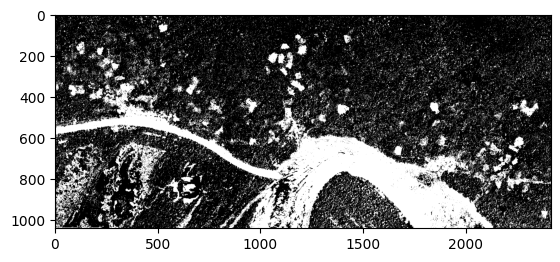

In [18]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure("OTSU")
plt.imshow(thresh, cmap="gray")

### Utilizacao do filtro de binario juntamente com a escala de cinza da imagem 

In [19]:
print(ret)

66.0


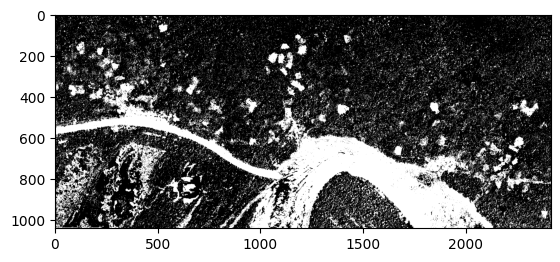

In [20]:
ret, thresh = cv2.threshold(gray, 66, 255, cv2.THRESH_BINARY)
plt.figure("Binary")
plt.imshow(thresh, cmap="gray")

### Inversao do binario

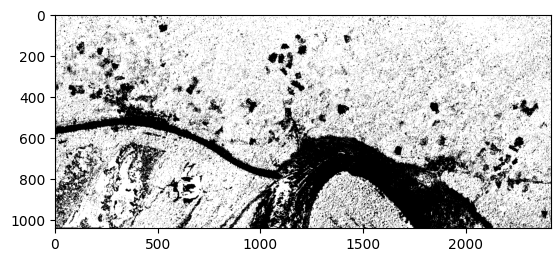

In [21]:
ret, thresh = cv2.threshold(gray, 66, 255, cv2.THRESH_BINARY_INV)
plt.figure("Binary")
plt.imshow(thresh, cmap="gray")

### Metodo de limiarizacao de triangulo

##### Este é o método de limiarização que está sendo usado. O método de limiarização de triângulo é uma variação do método de Otsu. Ele determina automaticamente o valor de limiar ótimo com base na forma do histograma de intensidades de pixel da imagem em escala de cinza. O método procura por um valor de limiar que maximize a separação entre as duas classes no histograma, assumindo que o histograma se assemelha a um triângulo.

[  0 100]


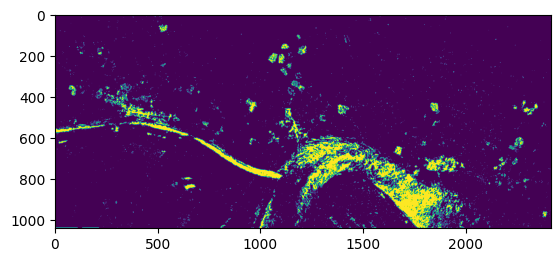

In [22]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_TRIANGLE)
plt.figure("Triangle") 

thresh = np.array(thresh)
thresh[thresh == 255] = 100

plt.imshow(thresh)
print(np.unique(thresh))


### Metodo Laplacian X Operadores Sobel(X|Y)

##### O filtro Laplacian é usado para calcular a segunda derivada de uma imagem em relação ao espaço. Em termos simples, ele destaca regiões de rápida mudança na intensidade dos pixels, o que frequentemente corresponde a bordas ou transições de contraste em uma imagem.
##### Os operadores Sobel são usados para calcular a primeira derivada da imagem em relação ao espaço, horizontalmente (Sobel X) e verticalmente (Sobel Y). Eles são usados principalmente para detecção de bordas e realce de características em imagens.

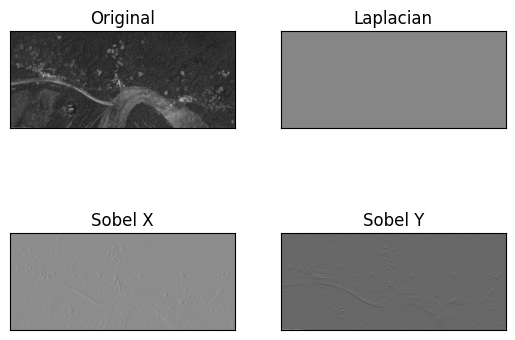

In [38]:
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()



### Conversao para HSV

#### Neste teste realizamos as operacoes de processamento de imagem com o objetivo de obter uma imagem para o espaco de cores HSV afim de realizar operacoes de segmentacao futuramente
#### Apos a limiarizacao com a tecnica de Otsu, algoritimo utilizado para detectar um valor de limiar com base no histograma da imagem



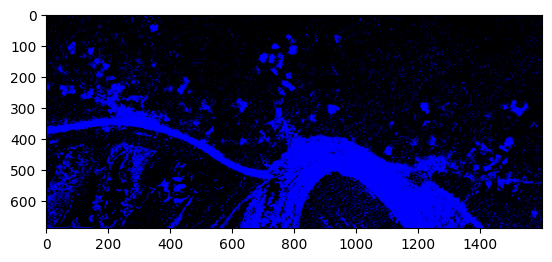

In [21]:
ret, thresh = cv2.threshold(gray, 70,  255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)

plt.imshow(thresh_hsv)

### Utilizacao da mascara

#### Apos da limiarizacao cria-se um mascara a fim de filtrar os pixels que estao definidos na faixa de cores especificada(uma faixa de matriz, saturação  e valor) e define esses pixels como brancos (255) na máscara. Os pixels que não estão na faixa são definidos como pretos (0). Aplicando um filtro de mediana para a redução de ruidos e suavização

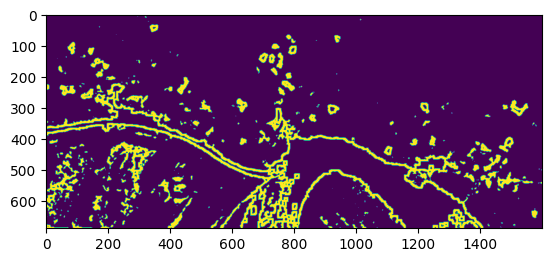

In [22]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(thresh_hsv, (0, 0, 250), (180, 70, 255))

mask = cv2.medianBlur(mask, 7)

thresh = cv2.adaptiveThreshold(mask, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=15, C=0)


plt.imshow(thresh)

### União das camadas 

#### Apos o processamento da imagem e realizada a operacao de fechamento binario na mascara, conectando algumas regioes proximas na mascara e preenchendo pequenos buracos. Em seguida a rotulação dos componentes e sobreposicao da imagem gerada com a inicial

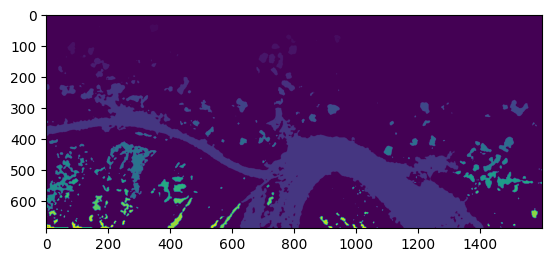

In [24]:
img = cv2.imread("./img/image1.jpeg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 90,  255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(thresh_hsv, (0, 0, 255), (180, 70, 255))
mask = cv2.medianBlur(mask, 7)

closed_mask = nd.binary_closing(mask, np.ones((1,1)))
label_image = measure.label(closed_mask)

plt.imshow(label_image)

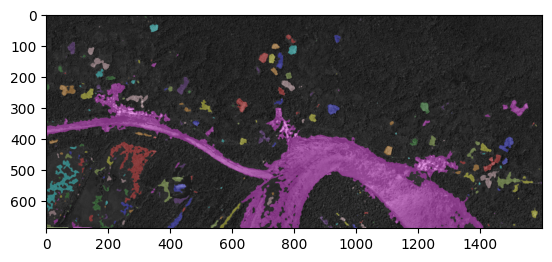

In [23]:
img = cv2.imread("./img/image1.jpeg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 90,  255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
thresh_hsv = cv2.cvtColor(thresh_bgr, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(thresh_hsv, (0, 0, 255), (180, 70, 255))
mask = cv2.medianBlur(mask, 7)

closed_mask = nd.binary_closing(mask, np.ones((1,1)))
label_image = measure.label(closed_mask)

image_label_overlay = label2rgb(label_image, image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.imshow(image_label_overlay)